<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Import Needed Libraries
    </h1>
    </div>

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
import plotly.io as pio
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Reading Dataset And Get Info
    </h1>
    </div>

In [2]:
df = pd.read_csv('./alzheimers_prediction_dataset.csv')

In [3]:
# Show Sample of Data
df.sample(5)

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
51097,Australia,82,Male,11,25.8,Medium,Former,Occasionally,Yes,No,...,Healthy,High,Retired,Widowed,Yes,High,High,Low,Urban,Yes
45258,South Africa,52,Female,4,26.2,Medium,Current,Never,No,No,...,Unhealthy,High,Unemployed,Single,No,High,Low,Low,Urban,No
3518,USA,70,Male,12,18.9,Low,Current,Never,No,No,...,Healthy,Low,Unemployed,Married,No,High,Low,Medium,Urban,Yes
41248,Germany,89,Male,5,19.8,Medium,Former,Never,No,Yes,...,Average,Medium,Retired,Single,No,High,Low,Medium,Rural,No
47313,Argentina,73,Male,2,24.9,High,Former,Occasionally,No,No,...,Average,High,Employed,Married,No,Medium,Medium,Low,Urban,No


In [4]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 74283
Number of Columns : 25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [6]:
# Check NaN Value
df.isna().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [7]:
# Describe Numiric Data
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


In [8]:
# Describe non Numiric Data
df.describe(exclude='number').T

,count,unique,top,freq
Country,74283,20,Brazil,3839
Gender,74283,2,Female,37249
Physical Activity Level,74283,3,High,24853
Smoking Status,74283,3,Current,24915
Alcohol Consumption,74283,3,Never,24865
Diabetes,74283,2,No,59527
Hypertension,74283,2,No,52134
Cholesterol Level,74283,2,Normal,51973
Family History of Alzheimer’s,74283,2,No,52004
Depression Level,74283,3,Medium,24843


In [9]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Country,74283,0,0.0,20
Age,74283,0,0.0,45
Gender,74283,0,0.0,2
Education Level,74283,0,0.0,20
BMI,74283,0,0.0,166
Physical Activity Level,74283,0,0.0,3
Smoking Status,74283,0,0.0,3
Alcohol Consumption,74283,0,0.0,3
Diabetes,74283,0,0.0,2
Hypertension,74283,0,0.0,2


In [10]:
# Check Dublication
df.duplicated().sum()

np.int64(0)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        Detection Outliers 
    </h1>
    </div>

In [11]:
def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Finding outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

numerical_columns =df.select_dtypes('number').columns.to_list()
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

Age: 0 outliers detected
Education Level: 0 outliers detected
BMI: 0 outliers detected
Cognitive Test Score: 0 outliers detected


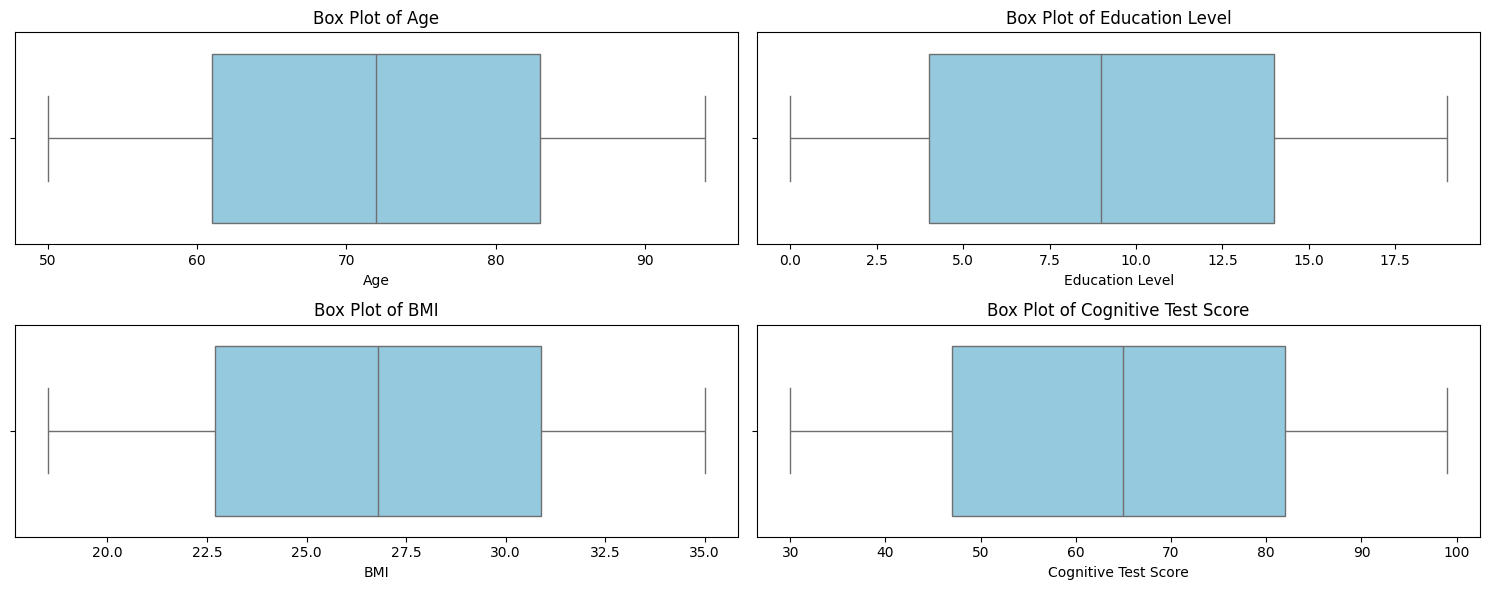

In [12]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(x = df[col], color = "skyblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         EDA of Data and Get Insights
    </h1>
    </div>

## Most Country has Alzheimer’s Diagnosis

In [13]:
fig = px.bar(df['Country'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts(),
             color = df['Country'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts().index,
             template = 'plotly_dark',
             title = 'Most Country has Alzheimer’s Diagnosis',
             labels = {'value':'Count'},
             text_auto = True
             )
pio.renderers.default = 'iframe'
fig.show()

- Most Country has Alzheimer’s Diagnosis -> Russia

## Distribution of Age has Alzheimer’s Diagnosis

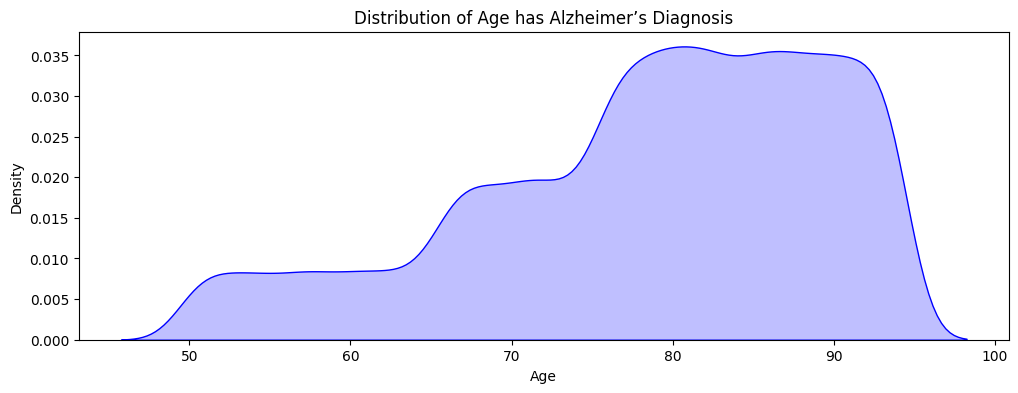

In [14]:
plt.figure(figsize=(12, 4))

sns.kdeplot(df['Age'][df['Alzheimer’s Diagnosis'] == 'Yes'], color='blue', fill=True)
plt.title('Distribution of Age has Alzheimer’s Diagnosis')

plt.show()

- Most people develop symptoms of Alzheimer's around the age of 80a

## What affects the diagnosis of Alzheimer's disease?

In [15]:
fig = px.pie(values = df['Physical Activity Level'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts(),
             names = df['Physical Activity Level'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts().index,
             template = 'plotly_dark',
             title = 'Is Physical Activity Level affect on Alzheimer’s Diagnosis?'
             ).update_traces(textinfo='label+percent')

fig.show()

- Activity level does not affect the diagnosis of Alzheimer's disease

In [16]:
fig = px.pie(values = df['Smoking Status'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts(),
             names = df['Smoking Status'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts().index,
             template = 'plotly_dark',
             title = 'Is Smoking Status affect on Alzheimer’s Diagnosis?'
             ).update_traces(textinfo='label+percent')

fig.show()

- Smoking Status does not affect the diagnosis of Alzheimer's disease

In [17]:
fig = px.pie(values = df['Alcohol Consumption'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts(),
             names = df['Alcohol Consumption'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts().index,
             template = 'plotly_dark',
             title = 'Is Alcohol Consumption affect on Alzheimer’s Diagnosis?'
             ).update_traces(textinfo='label+percent')
fig.show()

- Alcohol Consumption does not affect the diagnosis of Alzheimer's disease

In [18]:
fig = px.pie(values = df['Diabetes'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts(),
             names = df['Diabetes'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts().index,
             template = 'plotly_dark',
             title = 'Is Diabetes affect on Alzheimer’s Diagnosis?'
             ).update_traces(textinfo='label+percent')
fig.show()

- Most people diagnosed with Alzheimer's disease do not have diabetes

In [19]:
fig = px.pie(values = df['Hypertension'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts(),
             names = df['Hypertension'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts().index,
             template = 'plotly_dark',
             title = 'Is Hypertension affect on Alzheimer’s Diagnosis?'
             ).update_traces(textinfo='label+percent')
fig.show()

- Most people diagnosed with Alzheimer's disease do not have Hypertension

In [20]:
fig = px.pie(values = df['Cholesterol Level'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts(),
             names = df['Cholesterol Level'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts().index,
             template = 'plotly_dark',
             title = 'Is Cholesterol Level affect on Alzheimer’s Diagnosis?'
             ).update_traces(textinfo='label+percent')
fig.show()

- Most people diagnosed with Alzheimer's disease have Cholesterol Level Normal

In [21]:
fig = px.pie(values = df['Family History of Alzheimer’s'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts(),
             names = df['Family History of Alzheimer’s'][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts().index,
             template = 'plotly_dark',
             title = 'Is Family History of Alzheimer’s Level affect on Alzheimer’s Diagnosis?'
             ).update_traces(textinfo='label+percent')
fig.show()

- Most people diagnosed with Alzheimer's disease do not have Family History of Alzheimer’s

## Is Other Feature affect on Alzheimer’s Diagnosis?

In [22]:
other_columns = df.columns.to_list()[11:-1]
for column in other_columns[:7]:
   if column != 'Cognitive Test Score':
     print(pd.DataFrame(df[column][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts(normalize=True)*100))

                               proportion
Family History of Alzheimer’s            
No                              62.318888
Yes                             37.681112
                  proportion
Depression Level            
Low                33.383258
High               33.327907
Medium             33.288835
               proportion
Sleep Quality            
Good            33.796764
Average         33.269300
Poor            32.933937
                proportion
Dietary Habits            
Average          33.474425
Unhealthy        33.467913
Healthy          33.057663
                        proportion
Air Pollution Exposure            
Low                      33.448377
High                     33.396282
Medium                   33.155341
                   proportion
Employment Status            
Retired             33.552567
Unemployed          33.425585
Employed            33.021847


In [23]:
for column in other_columns[7:]:
   if column != 'Cognitive Test Score':
     print(pd.DataFrame(df[column][df['Alzheimer’s Diagnosis'] == 'Yes'].value_counts(normalize=True)*100))

                proportion
Marital Status            
Single           33.819555
Married          33.165109
Widowed          33.015336
                                      proportion
Genetic Risk Factor (APOE-ε4 allele)            
No                                     70.947156
Yes                                    29.052844
                         proportion
Social Engagement Level            
Medium                    33.526520
Low                       33.402794
High                      33.070687
              proportion
Income Level            
Medium         33.454889
Low            33.308371
High           33.236740
               proportion
Stress Levels            
High            33.500472
Medium          33.340931
Low             33.158597
                       proportion
Urban vs Rural Living            
Rural                   50.327223
Urban                   49.672777


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Data Preprocessing
    </h1>
    </div>

## Handling Object DataType

### Encode Object DataType 

In [24]:
column_to_encode = df.select_dtypes(object).columns.tolist()
le = LabelEncoder()
for column in column_to_encode:
    df[column] = le.fit_transform(df[column])

In [25]:
# Show Data After some of Encode
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,16,90,1,1,33.0,2,2,1,0,0,...,1,0,1,1,0,1,2,0,1,0
1,0,72,1,7,29.9,2,1,0,0,0,...,1,2,2,2,0,0,1,0,1,0
2,14,86,0,19,22.9,0,0,1,0,1,...,0,2,0,1,0,1,2,0,0,0
3,4,53,1,17,31.2,1,2,2,1,0,...,1,2,1,1,0,0,2,1,0,0
4,17,58,0,3,30.0,0,1,0,1,0,...,2,0,0,0,0,1,2,0,0,0


In [26]:
# Final Info after Encode
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  int64  
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  int64  
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  int64  
 6   Smoking Status                        74283 non-null  int64  
 7   Alcohol Consumption                   74283 non-null  int64  
 8   Diabetes                              74283 non-null  int64  
 9   Hypertension                          74283 non-null  int64  
 10  Cholesterol Level                     74283 non-null  int64  
 11  Family History 

In [27]:
fig = px.imshow(df.corr(), 
                text_auto=True, 
                color_continuous_scale = "tempo",  
                template='plotly_dark',
                title="Correlation Heatmap")
fig.update_layout(
    width=1260, 
    height=1260  
)
fig.show()

## Assign feature and target variables

In [28]:
df.fillna(0)

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,16,90,1,1,33.0,2,2,1,0,0,...,1,0,1,1,0,1,2,0,1,0
1,0,72,1,7,29.9,2,1,0,0,0,...,1,2,2,2,0,0,1,0,1,0
2,14,86,0,19,22.9,0,0,1,0,1,...,0,2,0,1,0,1,2,0,0,0
3,4,53,1,17,31.2,1,2,2,1,0,...,1,2,1,1,0,0,2,1,0,0
4,17,58,0,3,30.0,0,1,0,1,0,...,2,0,0,0,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,12,60,0,3,22.6,0,1,0,0,0,...,0,0,2,2,0,2,0,2,0,0
74279,18,58,1,18,30.6,1,2,1,1,0,...,0,2,2,1,0,2,0,0,0,0
74280,16,57,0,13,28.2,2,2,2,0,0,...,1,1,0,1,1,0,1,1,0,0
74281,2,73,0,7,29.0,1,2,2,0,0,...,1,1,0,2,0,1,1,0,0,0


In [36]:
X = df.drop(labels=['Country','Sleep Quality','Air Pollution Exposure','Urban vs Rural Living','Income Level','Social Engagement Level',
                    'Alzheimer’s Diagnosis','Marital Status','Employment Status'] , axis = 1)
y = df['Alzheimer’s Diagnosis']

In [53]:
X.columns

Index(['Age', 'Gender', 'Education Level', 'BMI', 'Physical Activity Level',
       'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension',
       'Cholesterol Level', 'Family History of Alzheimer’s',
       'Cognitive Test Score', 'Depression Level', 'Dietary Habits',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Stress Levels'],
      dtype='object')

## Splitting Data 

In [37]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 44 , shuffle = True)

In [38]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (55712, 16)
Shape of X_Test (18571, 16)
Shape of Y_Train (55712,)
Shape of Y_Test (18571,)


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:black;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
         Modeling
    </h1>
    </div>

## Use Different Models Algorithm

In [39]:
def Kfold(model,model_name):
    model = cross_val_score(model , X , y , cv = 5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

In [40]:
bagg_model = BaggingClassifier(n_estimators=100)
Kfold(bagg_model, "Bagging")
train(bagg_model, "Bagging")

Bagging score on cross validation: 71.02566809145048%
Bagging model score on Training data: 99.99641010913268%
Bagging model score on Testing data: 70.17392709062517%


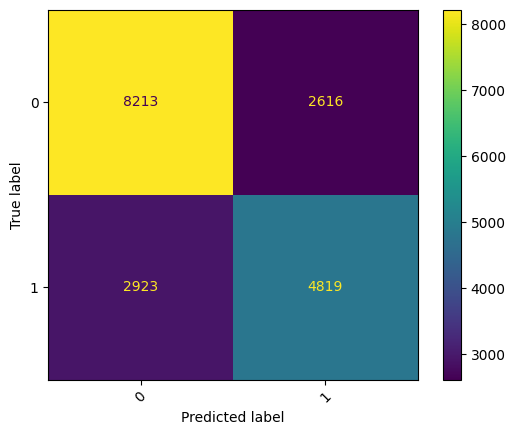

In [41]:
ConfusionMatrixDisplay.from_estimator(bagg_model,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [44]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75     10829
           1       0.65      0.62      0.64      7742

    accuracy                           0.70     18571
   macro avg       0.69      0.69      0.69     18571
weighted avg       0.70      0.70      0.70     18571



In [54]:
%time
questions = ['Age', 'Gender', 'Education Level', 'BMI', 'Physical Activity Level',
       'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension',
       'Cholesterol Level', 'Family History of Alzheimer’s',
       'Cognitive Test Score', 'Depression Level', 'Dietary Habits',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Stress Levels']
answers = []
print("Please enter the following details: ")
for i in questions:
    print(i, ": ", end="")
    temp = input()
    answers.append(temp)

report = {}

for key in questions:
    for value in answers:
        report[key] = value
        answers.remove(value)
        break


CPU times: user 8 μs, sys: 0 ns, total: 8 μs
Wall time: 14.5 μs
Please enter the following details: 
Age : 

 1


Gender : 

 1


Education Level : 

 1


BMI : 

 1


Physical Activity Level : 

 1


Smoking Status : 

 1


Alcohol Consumption : 

 1


Diabetes : 

 1


Hypertension : 

 1


Cholesterol Level : 

 1


Family History of Alzheimer’s : 

 1


Cognitive Test Score : 

 1


Depression Level : 

 1


Dietary Habits : 

 1


Genetic Risk Factor (APOE-ε4 allele) : 

 1


Stress Levels : 

 1


In [57]:
# Convert dictionary(report) to DataFrame(patient_df)
patient_df = pd.DataFrame([report])

# Make a prediction
prediction = bagg_model.predict(patient_df)

if prediction[0] == 0:
    print("The patient does not have Alzheimers")
else:
    print("The patient has Alzheimers")

The patient does not have Alzheimers


In [59]:
from joblib import dump
dump(bagg_model, 'alzheimers-prediction.joblib')

['alzheimers-prediction.joblib']